# Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')
from math import nan

# Lectura de Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
num = pd.read_csv("/content/drive/Shareddrives/Aplicacion de metodos multivariados en ciencia de datos/numeros (1).csv")

# Fecha - Hora

In [ ]:
from datetime import datetime

In [ ]:
num["Fecha"] = pd.to_datetime(num["Fecha"])
num["day"] = num["Fecha"].dt.strftime("%Y-%m-%d")
num["hour"] = num["Fecha"].dt.strftime("%H:%M:%S")
num

,Fecha,CO,NO,NO2,NOx,O3,PM25,PM10,PRS,RAINF,RH,SO2,SR,TOUT,WD,WS,day,hour
0,2017-01-01 00:00:00,2.47,16.0,15.1,31.1,6.0,NaN,143.0,709.2,0.0,64.0,NaN,0.004,19.46,300.0,3.0,2017-01-01,00:00:00
1,2017-01-01 01:00:00,2.18,8.9,11.7,20.6,5.0,NaN,183.0,708.9,0.0,66.0,NaN,0.004,18.92,226.0,2.0,2017-01-01,01:00:00
2,2017-01-01 02:00:00,1.77,2.0,8.6,10.5,6.0,NaN,142.0,708.5,0.0,56.0,NaN,0.004,20.42,246.0,2.6,2017-01-01,02:00:00
3,2017-01-01 03:00:00,1.93,7.2,10.0,17.2,7.0,NaN,101.0,708.2,0.0,52.0,NaN,0.004,21.21,152.0,5.4,2017-01-01,03:00:00
4,2017-01-01 04:00:00,1.70,2.1,8.6,10.7,7.0,NaN,85.0,707.9,0.0,54.0,NaN,0.004,20.47,232.0,3.6,2017-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39390,2017-02-02 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-02,20:00:00
39391,2017-02-09 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-09,18:00:00
39392,2017-02-10 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-10,10:00:00
39393,2017-02-16 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-16,18:00:00


In [ ]:
num.sort_values(by = 'Fecha', ascending = True, inplace = True)
num.Fecha

0       2017-01-01 00:00:00
1       2017-01-01 01:00:00
2       2017-01-01 02:00:00
3       2017-01-01 03:00:00
4       2017-01-01 04:00:00
                ...        
28461   2021-06-30 20:00:00
28462   2021-06-30 21:00:00
28463   2021-06-30 22:00:00
28464   2021-06-30 23:00:00
28465                   NaT
Name: Fecha, Length: 39395, dtype: datetime64[ns]

In [ ]:
num["day"] = pd.to_datetime(num["day"])

num['YEAR'] = num['day'].dt.year
num["YEAR"] = np.nan_to_num(num["YEAR"]).astype(int)

num['MONTH'] = num['day'].dt.month
num["MONTH"] = np.nan_to_num(num["MONTH"]).astype(int)

num['WEEKDAY'] = num['day'].dt.weekday
num["WEEKDAY"] = np.nan_to_num(num["WEEKDAY"]).astype(int)

num["MONTHDAY"] = num["day"].dt.strftime("%d")

In [ ]:
num.dtypes

Fecha       datetime64[ns]
CO                 float64
NO                 float64
NO2                float64
NOx                float64
O3                 float64
PM25               float64
PM10               float64
PRS                float64
RAINF              float64
RH                 float64
SO2                float64
SR                 float64
TOUT               float64
WD                 float64
WS                 float64
day         datetime64[ns]
hour                object
YEAR                 int64
MONTH                int64
WEEKDAY              int64
MONTHDAY            object
dtype: object

In [ ]:
num.tail(15) 

,Fecha,CO,NO,NO2,NOx,O3,PM25,PM10,PRS,RAINF,RH,SO2,SR,TOUT,WD,WS,day,hour,YEAR,MONTH,WEEKDAY,MONTHDAY
28451,2021-06-30 10:00:00,1.95,4.4,5.6,10.3,20.0,7.25,47.0,713.0,0.0,71.0,NaN,0.368,23.68,59.0,8.7,2021-06-30,10:00:00,2021,6,2,30
28452,2021-06-30 11:00:00,1.86,3.4,3.9,7.5,26.0,5.56,41.0,712.9,0.0,65.0,NaN,0.767,25.19,56.0,11.0,2021-06-30,11:00:00,2021,6,2,30
28453,2021-06-30 12:00:00,1.81,2.6,3.0,5.8,31.0,4.68,32.0,712.6,0.0,58.0,NaN,0.877,26.39,62.0,11.7,2021-06-30,12:00:00,2021,6,2,30
28454,2021-06-30 13:00:00,1.81,2.7,3.3,6.3,33.0,4.84,32.0,712.2,0.0,57.0,NaN,0.622,26.50,66.0,12.9,2021-06-30,13:00:00,2021,6,2,30
28455,2021-06-30 14:00:00,1.80,2.1,2.9,5.2,39.0,5.04,30.0,711.9,0.0,53.0,NaN,0.758,27.41,61.0,13.0,2021-06-30,14:00:00,2021,6,2,30
28456,2021-06-30 15:00:00,1.80,2.2,3.5,6.0,41.0,7.27,32.0,711.6,0.0,52.0,2.0,0.594,27.88,70.0,12.8,2021-06-30,15:00:00,2021,6,2,30
28457,2021-06-30 16:00:00,1.83,2.0,4.0,6.3,42.0,10.13,42.0,711.3,0.0,51.0,2.9,0.393,28.15,74.0,13.2,2021-06-30,16:00:00,2021,6,2,30
28458,2021-06-30 17:00:00,1.90,2.2,5.0,7.4,28.0,10.57,52.0,711.2,0.0,62.0,2.8,0.137,26.34,101.0,12.5,2021-06-30,17:00:00,2021,6,2,30
28459,2021-06-30 18:00:00,1.95,2.5,5.5,8.2,19.0,6.93,45.0,711.4,0.0,77.0,2.0,0.050,23.28,118.0,9.0,2021-06-30,18:00:00,2021,6,2,30
28460,2021-06-30 19:00:00,1.89,1.8,4.3,6.3,19.0,4.33,24.0,711.6,0.0,79.0,1.9,0.040,23.31,99.0,9.4,2021-06-30,19:00:00,2021,6,2,30


# Radiación solar 

Si el mismo valor aparece más de 8 o 9 horas, es un dato inválido

In [ ]:
from datetime import timedelta

In [ ]:
import copy 

In [ ]:
df = copy.deepcopy(num)

Si un mismo valor aparece por más de 9 horas es un dato inválido.

In [ ]:
for i in range(df.hour.size-1):
    if df.hour[i] ==  df.hour[i+1] \
       and df.hour[i] ==  df.hour[i+2] \
       and df.hour[i] ==  df.hour[i+3] \
       and df.hour[i] ==  df.hour[i+4] \
       and df.hour[i] ==  df.hour[i+5] \
       and df.hour[i] ==  df.hour[i+6] \
       and df.hour[i] ==  df.hour[i+7] \
       and df.hour[i] ==  df.hour[i+8]:
    
        df.hour[i] = None
df[df.hour == None]

,Fecha,CO,NO,NO2,NOx,O3,PM25,PM10,PRS,RAINF,RH,SO2,SR,TOUT,WD,WS,day,hour,YEAR,MONTH,WEEKDAY,MONTHDAY


Valores en la noche mayores a 0.01 y menores a 0.09. 
La noche comienza a las 20:00:00 y termina a las 07:00:00.

In [ ]:
dn = df['20:00:00' <= df.hour].loc[df.SR > 0.01]
df.loc[dn.loc[dn.SR < 0.09].index,'SR']

1607     0.018
3193     0.011
3505     0.013
3529     0.011
3577     0.022
         ...  
28154    0.012
28178    0.011
28250    0.014
28274    0.012
28322    0.025
Name: SR, Length: 126, dtype: float64

In [ ]:
df.loc[dn.loc[dn.SR < 0.09].index,'SR'] = 0
df.loc[dn.loc[dn.SR < 0.09].index,'SR']

1607     0.0
3193     0.0
3505     0.0
3529     0.0
3577     0.0
        ... 
28154    0.0
28178    0.0
28250    0.0
28274    0.0
28322    0.0
Name: SR, Length: 126, dtype: float64

In [ ]:
dn2 = df['07:00:00' > df.hour].loc[df.SR > 0.01]
df.loc[dn2.loc[dn2.SR < 0.09].index,'SR']

1977    0.011
2049    0.013
2073    0.015
2121    0.013
Name: SR, dtype: float64

In [ ]:
df.loc[dn2.loc[dn2.SR < 0.09].index,'SR'] = 0
df.loc[dn2.loc[dn2.SR < 0.09].index,'SR']

1977    0.0
2049    0.0
2073    0.0
2121    0.0
Name: SR, dtype: float64

# Viento

In [ ]:
# Diccionario de valores de dirección del viento:

import copy 
new_df = copy.deepcopy(df) 

new_df = new_df.drop_duplicates(subset=['WD','day'], keep='first')   

1: Norte 2: Noroeste 3: Oeste 4: Suroeste 5: Sur 6: Sureste 7: Este 8: Noreste

In [ ]:
new_df.loc[num.WD <= 45,'Dirección_Viento']= 1
new_df.loc[(num.WD > 45) & (num.WD <= 90),'Dirección_Viento'] = 2  
new_df.loc[(num.WD > 90) & (num.WD <= 135),'Dirección_Viento'] = 3
new_df.loc[(num.WD > 135) & (num.WD <= 180),'Dirección_Viento'] = 4 
new_df.loc[(num.WD > 180) & (num.WD <= 225),'Dirección_Viento'] = 5
new_df.loc[(num.WD > 225) & (num.WD <= 270),'Dirección_Viento'] = 6
new_df.loc[(num.WD > 270) & (num.WD <= 315),'Dirección_Viento'] = 7
new_df.loc[num.WD > 315,'Dirección_Viento']= 8
new_df.head()

,Fecha,CO,NO,NO2,NOx,O3,PM25,PM10,PRS,RAINF,RH,SO2,SR,TOUT,WD,WS,day,hour,YEAR,MONTH,WEEKDAY,MONTHDAY,Dirección_Viento
0,2017-01-01 00:00:00,2.47,16.0,15.1,31.1,6.0,NaN,143.0,709.2,0.0,64.0,NaN,0.004,19.46,300.0,3.0,2017-01-01,00:00:00,2017,1,6,01,7.0
1,2017-01-01 01:00:00,2.18,8.9,11.7,20.6,5.0,NaN,183.0,708.9,0.0,66.0,NaN,0.004,18.92,226.0,2.0,2017-01-01,01:00:00,2017,1,6,01,6.0
2,2017-01-01 02:00:00,1.77,2.0,8.6,10.5,6.0,NaN,142.0,708.5,0.0,56.0,NaN,0.004,20.42,246.0,2.6,2017-01-01,02:00:00,2017,1,6,01,6.0
3,2017-01-01 03:00:00,1.93,7.2,10.0,17.2,7.0,NaN,101.0,708.2,0.0,52.0,NaN,0.004,21.21,152.0,5.4,2017-01-01,03:00:00,2017,1,6,01,4.0
4,2017-01-01 04:00:00,1.70,2.1,8.6,10.7,7.0,NaN,85.0,707.9,0.0,54.0,NaN,0.004,20.47,232.0,3.6,2017-01-01,04:00:00,2017,1,6,01,6.0


In [ ]:
#new_df.to_excel('DatosViento.xlsx', index = False) 

# Principal Components Analysis

In [ ]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')  

In [ ]:
import copy 
datos_PCA = copy.deepcopy(new_df[['CO','NO','NO2','NOx','O3','PM25','PM10','PRS','RAINF','RH','SO2','SR','TOUT','WD','WS']]) 
datos_PCA = datos_PCA.dropna()

In [ ]:
datos_PCA.describe()

,CO,NO,NO2,NOx,O3,PM25,PM10,PRS,RAINF,RH,SO2,SR,TOUT,WD,WS
count,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000
mean,2.005632,8.083724,8.327535,16.331101,31.468381,25.835330,57.770343,711.158542,0.000001,56.252436,4.234045,0.208238,23.196643,116.808418,6.551078
std,0.944595,14.521873,6.833174,17.503071,22.437637,16.497851,35.540283,3.450812,0.000102,18.937660,2.542325,0.215466,6.350850,86.188722,3.517650
min,0.100000,0.500000,0.000000,1.300000,1.000000,2.170000,5.000000,700.300000,0.000000,1.000000,1.100000,0.000000,2.540000,1.000000,0.900000
25%,1.290000,2.000000,3.500000,6.000000,13.000000,13.600000,34.000000,708.900000,0.000000,42.000000,2.700000,0.155000,19.250000,59.000000,3.800000
50%,1.970000,3.600000,6.400000,10.900000,27.000000,22.000000,50.000000,710.900000,0.000000,57.000000,3.400000,0.172000,23.580000,90.000000,6.200000
75%,2.670000,7.700000,11.200000,20.500000,45.000000,34.230000,73.000000,713.100000,0.000000,72.000000,5.200000,0.183000,27.777500,142.000000,8.800000
max,6.620000,253.200000,78.100000,263.500000,148.000000,185.000000,526.000000,724.800000,0.010000,94.000000,30.600000,1.062000,40.260000,360.000000,23.400000


In [ ]:
#datos_PCA.to_csv('DatosPCA.csv', index = False)    

In [ ]:
datos_PCA.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9646 entries, 1376 to 28462
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      9646 non-null   float64
 1   NO      9646 non-null   float64
 2   NO2     9646 non-null   float64
 3   NOx     9646 non-null   float64
 4   O3      9646 non-null   float64
 5   PM25    9646 non-null   float64
 6   PM10    9646 non-null   float64
 7   PRS     9646 non-null   float64
 8   RAINF   9646 non-null   float64
 9   RH      9646 non-null   float64
 10  SO2     9646 non-null   float64
 11  SR      9646 non-null   float64
 12  TOUT    9646 non-null   float64
 13  WD      9646 non-null   float64
 14  WS      9646 non-null   float64
dtypes: float64(15)
memory usage: 1.2 MB


In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components = 7))
pca_pipe.fit(datos_PCA)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
matriz_PCA = pd.DataFrame(
                    data    = modelo_pca.components_,
                    columns = datos_PCA.columns,
                    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7']
              )

matriz_PCA_T = matriz_PCA.T

matriz_PCA_T 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
CO,0.288277,-0.014673,-0.382692,-0.133126,0.006731,-0.183202,0.053363
NO,0.146045,0.323450,0.560787,-0.059130,-0.010421,-0.061690,-0.070250
NO2,0.343520,0.262915,0.017873,-0.015556,-0.013791,0.035186,0.159411
NOx,0.250878,0.368668,0.477823,-0.049167,-0.015094,-0.028583,0.008459
O3,-0.372257,0.233575,-0.156387,-0.145922,0.003119,-0.150801,0.078638
PM25,0.277693,0.290384,-0.316084,0.113842,-0.011705,0.297407,0.083954
PM10,0.210214,0.366322,-0.345263,0.002469,-0.000388,0.118242,0.114406
PRS,0.172811,-0.220308,0.037222,-0.680701,0.040752,-0.267320,0.059935
RAINF,-0.003781,0.005099,0.029875,0.028744,0.993736,0.055535,0.084304
RH,0.247467,-0.334096,0.164498,0.081860,-0.043598,0.455326,0.123893


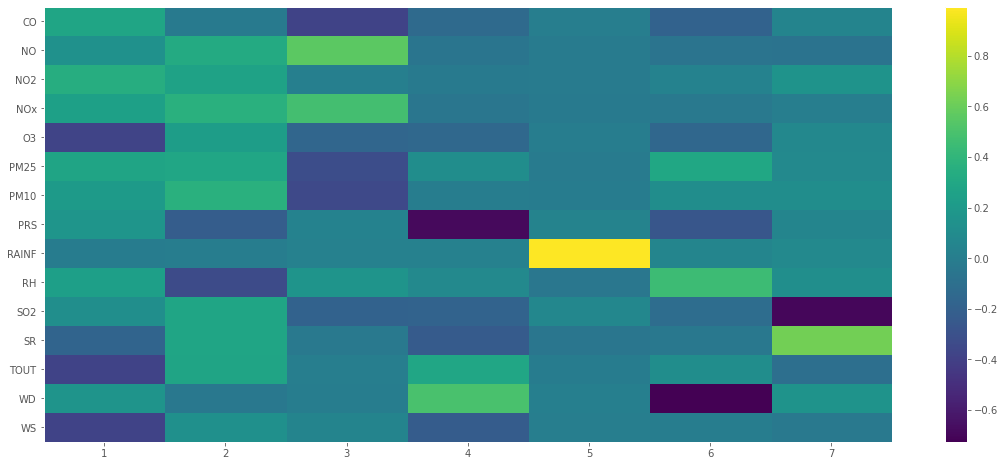

In [ ]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(19, 8)) 
componentes = modelo_pca.components_ 
plt.imshow(componentes.T, cmap='viridis', aspect='auto') 
plt.yticks(range(len(datos_PCA.columns)), datos_PCA.columns)
plt.xticks(range(7), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

-------------------------------------------------------------------------
Porcentaje de varianza explicada por cada componente
-------------------------------------------------------------------------
[0.22932241 0.18874781 0.11066574 0.08141545 0.066718   0.06215564
 0.05605408]


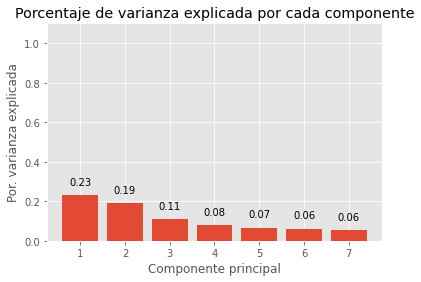

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('-------------------------------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('-------------------------------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos_PCA.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.22932241 0.41807022 0.52873596 0.61015142 0.67686942 0.73902505
 0.79507913]


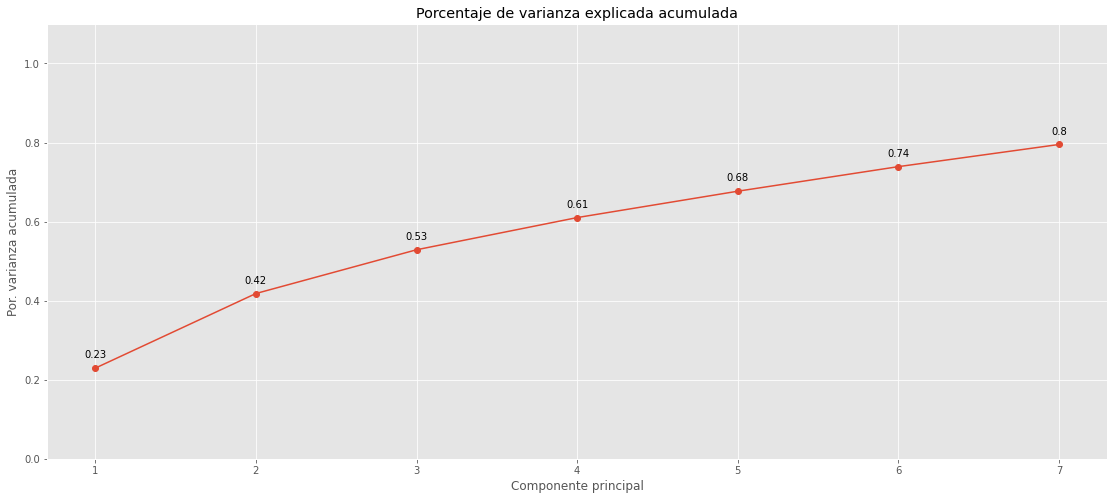

In [ ]:

# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(19, 8))
ax.plot(
    np.arange(modelo_pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos_PCA.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [ ]:
#proyecciones = np.dot(modelo_pca.components_, scale(datos_PCA).T)
#proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7'])
#proyecciones = proyecciones.transpose().set_index(datos_PCA.index) 
#proyecciones.head()   

In [ ]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos_PCA)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7'],
    index   = datos_PCA.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
1376,2.025968,-0.014071,-0.760564,1.810695,0.014598,-0.637597,0.004217
1377,1.794041,-0.493155,-0.714407,1.746953,0.005994,-0.459001,-0.021411
1378,2.589900,0.278669,-1.424591,1.894536,-0.019395,0.329103,0.151647
1382,-0.525475,1.605480,-1.333358,-1.170191,0.017216,0.369883,0.389146
1383,1.642697,5.574049,-5.398191,-0.836713,-0.126640,3.144455,2.342803


# Análisis de Factores

In [ ]:
!pip install factor_analyzer

     |████████████████████████████████| 40 kB 3.3 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=106a4722dc760def322fdb1611feaf85adb784c2fda67507b414a3fb4a2484f4
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [ ]:
# Import required libraries
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
import copy 
datos_FA = copy.deepcopy(datos_PCA)

In [ ]:
#datos_FA.to_csv('DatosFA.csv', index = False) 

In [ ]:
datos_FA.head()

,CO,NO,NO2,NOx,O3,PM25,PM10,PRS,RAINF,RH,SO2,SR,TOUT,WD,WS
1376,2.48,3.7,13.6,17.3,9.0,34.0,98.0,709.4,0.0,56.0,4.0,0.003,22.43,256.0,1.7
1377,2.40,2.5,10.9,13.4,10.0,33.0,87.0,709.5,0.0,61.0,3.8,0.003,21.78,242.0,1.5
1378,2.41,3.1,11.8,14.8,7.0,77.0,81.0,709.9,0.0,60.0,3.9,0.003,21.59,235.0,1.9
1382,2.57,5.8,8.5,14.3,28.0,23.0,158.0,712.3,0.0,35.0,3.8,0.308,25.93,34.0,12.2
1383,2.39,4.0,5.1,9.1,34.0,167.0,268.0,713.3,0.0,29.0,3.6,0.626,26.21,25.0,13.7


Adequacy Test:

Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

*   Bartlett’s Test
*   Kaiser-Meyer-Olkin Test

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [ ]:
#OBTENIENDO LA PRUEBA DE ESFERICIDAD DE BARTLETT
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity 
chi_square_value,p_value=calculate_bartlett_sphericity(datos_FA)
chi_square_value, p_value

(92185.42342733567, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

**Choosing the Number of Factors:**

For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [ ]:
fa = FactorAnalyzer()
fa.fit(datos_FA)
eigen_values, vectors = fa.get_eigenvalues()
(eigen_values > 1).sum()

5

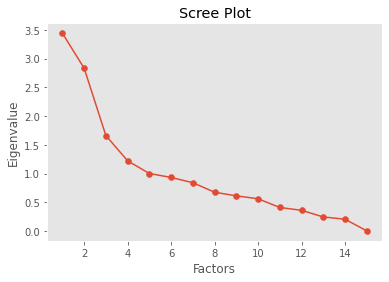

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,datos_FA.shape[1]+1),eigen_values)
plt.plot(range(1,datos_FA.shape[1]+1),eigen_values)
plt.title('Scree Plot')  
plt.xlabel('Factors')  
plt.ylabel('Eigenvalue')  
plt.grid() 
plt.show()

Here, you can see only for 5-factors eigenvalues are greater than one. It means we need to choose only 5 factors (or unobserved variables).

In [ ]:
fa = FactorAnalyzer()
fa.set_params(n_factors = 5, method='principal', rotation = 'varimax')
fa.fit(datos_FA)
loadings = fa.loadings_ 

loadings_FA = pd.DataFrame(loadings)
loadings_FA 

,0,1,2,3,4
0,-0.297459,0.592665,-0.221738,0.248851,-0.021036
1,0.048617,0.023826,0.944711,-0.021150,0.011287
2,-0.211920,0.592613,0.453273,0.026706,-0.019330
3,-0.041770,0.239607,0.961323,-0.013794,0.001254
4,0.811667,-0.035777,-0.157972,-0.112631,0.005201
5,-0.093773,0.802633,0.090535,-0.154812,-0.025083
6,0.118151,0.833959,0.097240,-0.103329,-0.015553
7,-0.193957,-0.015187,-0.003539,0.878576,0.014358
8,-0.007213,0.000503,0.007602,-0.002965,0.995372
9,-0.715112,-0.192529,0.010200,0.176297,-0.045194


In [ ]:
# Get variance of each factors 
factor_VAR = fa.get_factor_variance()

pd.DataFrame(factor_VAR, columns = ['F1','F2','F3','F4','F5'], index = ['SS Loadings','Proportion Var','Accum Var'])

,F1,F2,F3,F4,F5
SS Loadings,2.951783,2.588058,2.158512,1.452460,1.002229
Proportion Var,0.196786,0.172537,0.143901,0.096831,0.066815
Accum Var,0.196786,0.369323,0.513224,0.610054,0.676869


In [ ]:
pd.DataFrame(fa.corr_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,-0.092983,0.241710,-0.000325,-0.233622,0.346499,0.305931,0.210243,-0.017956,0.074275,0.151790,-0.129478,-0.380290,0.130476,-0.324420
1,-0.092983,1.000000,0.256119,0.925730,-0.091257,0.124332,0.134753,-0.020198,0.011862,-0.042280,0.170808,0.114708,0.069046,0.047007,0.008034
2,0.241710,0.256119,1.000000,0.595953,-0.218378,0.454449,0.430800,0.015131,-0.001829,-0.005862,0.236990,0.022652,-0.286868,0.103737,-0.340052
3,-0.000325,0.925730,0.595953,1.000000,-0.159314,0.278143,0.274423,-0.015530,0.009174,-0.030730,0.225603,0.104959,-0.049026,0.078424,-0.121566
4,-0.233622,-0.091257,-0.218378,-0.159314,1.000000,-0.086143,-0.000402,-0.206739,-0.002482,-0.583491,0.038825,0.398913,0.550601,-0.209866,0.524646
5,0.346499,0.124332,0.454449,0.278143,-0.086143,1.000000,0.670199,-0.116792,-0.004219,0.042155,0.308910,0.033793,-0.089873,0.072109,-0.238626
6,0.305931,0.134753,0.430800,0.274423,-0.000402,0.670199,1.000000,-0.097034,-0.004518,-0.195112,0.361585,0.184600,-0.008984,0.054040,-0.106959
7,0.210243,-0.020198,0.015131,-0.015530,-0.206739,-0.116792,-0.097034,1.000000,-0.000763,0.207792,0.011847,-0.091520,-0.606025,-0.060435,-0.127538
8,-0.017956,0.011862,-0.001829,0.009174,-0.002482,-0.004219,-0.004518,-0.000763,1.000000,-0.007126,0.005071,-0.008093,0.012720,0.003803,0.005642
9,0.074275,-0.042280,-0.005862,-0.030730,-0.583491,0.042155,-0.195112,0.207792,-0.007126,1.000000,-0.225417,-0.306462,-0.487551,0.025507,-0.418599


In [ ]:
pd.DataFrame(fa.get_communalities(), columns = ['Communality'], index = ['CO','NO','NO2','NOx','O3','PM25','PM10','PRS','RAINF','RH','SO2','SR','TOUT','WD','WS'])

,Communality
CO,0.551270
NO,0.895985
NO2,0.602644
NOx,0.983490
O3,0.697751
PM25,0.685806
PM10,0.729821
PRS,0.809965
RAINF,0.990885
RH,0.581680


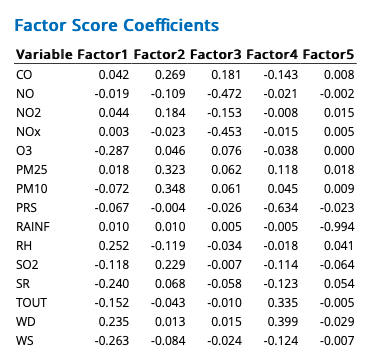

# Conglomerados

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator 
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
import copy 
datos_Conglomerados = copy.deepcopy(new_df[['CO','NO','NO2','NOx','O3','PM25','PM10','PRS','RAINF','RH','SO2','SR','TOUT','WD','WS']])
datos_Conglomerados = datos_Conglomerados.dropna()

In [ ]:
datos_Conglomerados

,CO,NO,NO2,NOx,O3,PM25,PM10,PRS,RAINF,RH,SO2,SR,TOUT,WD,WS
1376,2.48,3.7,13.6,17.3,9.0,34.00,98.0,709.4,0.0,56.0,4.0,0.003,22.43,256.0,1.7
1377,2.40,2.5,10.9,13.4,10.0,33.00,87.0,709.5,0.0,61.0,3.8,0.003,21.78,242.0,1.5
1378,2.41,3.1,11.8,14.8,7.0,77.00,81.0,709.9,0.0,60.0,3.9,0.003,21.59,235.0,1.9
1382,2.57,5.8,8.5,14.3,28.0,23.00,158.0,712.3,0.0,35.0,3.8,0.308,25.93,34.0,12.2
1383,2.39,4.0,5.1,9.1,34.0,167.00,268.0,713.3,0.0,29.0,3.6,0.626,26.21,25.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,1.83,2.0,4.0,6.3,42.0,10.13,42.0,711.3,0.0,51.0,2.9,0.393,28.15,74.0,13.2
28458,1.90,2.2,5.0,7.4,28.0,10.57,52.0,711.2,0.0,62.0,2.8,0.137,26.34,101.0,12.5
28459,1.95,2.5,5.5,8.2,19.0,6.93,45.0,711.4,0.0,77.0,2.0,0.050,23.28,118.0,9.0
28460,1.89,1.8,4.3,6.3,19.0,4.33,24.0,711.6,0.0,79.0,1.9,0.040,23.31,99.0,9.4


In [ ]:
x = datos_Conglomerados.iloc[:,[0, 1, 2, 3, 4, 5, 6, 10]].values
x

array([[ 2.48,  3.7 , 13.6 , ..., 34.  , 98.  ,  4.  ],
       [ 2.4 ,  2.5 , 10.9 , ..., 33.  , 87.  ,  3.8 ],
       [ 2.41,  3.1 , 11.8 , ..., 77.  , 81.  ,  3.9 ],
       ...,
       [ 1.95,  2.5 ,  5.5 , ...,  6.93, 45.  ,  2.  ],
       [ 1.89,  1.8 ,  4.3 , ...,  4.33, 24.  ,  1.9 ],
       [ 1.9 ,  1.6 ,  5.5 , ...,  5.51, 21.  ,  1.8 ]])

## The elbow method / Diagrama de codo

In [ ]:
kmeans_kwargs = {
           "init" : "random",
           "n_init": 10, 
           "max_iter" : 300,
           "random_state" : 42
}

In [ ]:
# A list holds the SSE values for each k
sse = []

In [ ]:
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(x)  
  sse.append(kmeans.inertia_)

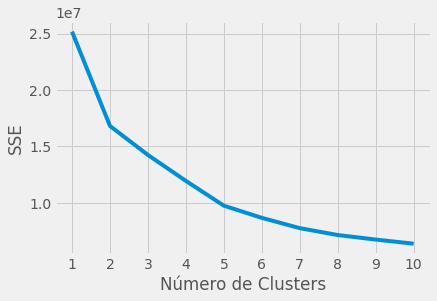

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.show()

## The silhouette coefficient / Diagrama de coeficiente de siluetas 

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

In [ ]:
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(x)
  score = silhouette_score(x, kmeans.labels_)
  silhouette_coefficients.append(score)

Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the maximum score:

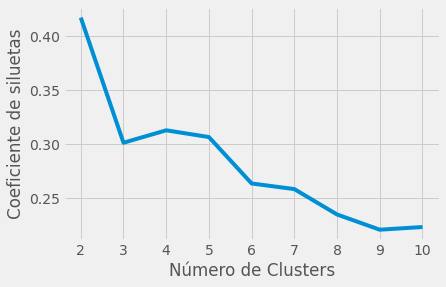

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Número de Clusters")
plt.ylabel("Coeficiente de siluetas")
plt.show()

## Visualización

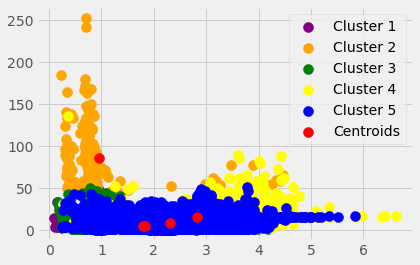

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'blue', label = 'Cluster 5')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [ ]:
datos_Conglomerados['Predicted']=kmeans.labels_.tolist()
datos_Conglomerados

,CO,NO,NO2,NOx,O3,PM25,PM10,PRS,RAINF,RH,SO2,SR,TOUT,WD,WS,Predicted
1376,2.48,3.7,13.6,17.3,9.0,34.00,98.0,709.4,0.0,56.0,4.0,0.003,22.43,256.0,1.7,4
1377,2.40,2.5,10.9,13.4,10.0,33.00,87.0,709.5,0.0,61.0,3.8,0.003,21.78,242.0,1.5,4
1378,2.41,3.1,11.8,14.8,7.0,77.00,81.0,709.9,0.0,60.0,3.9,0.003,21.59,235.0,1.9,4
1382,2.57,5.8,8.5,14.3,28.0,23.00,158.0,712.3,0.0,35.0,3.8,0.308,25.93,34.0,12.2,3
1383,2.39,4.0,5.1,9.1,34.0,167.00,268.0,713.3,0.0,29.0,3.6,0.626,26.21,25.0,13.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,1.83,2.0,4.0,6.3,42.0,10.13,42.0,711.3,0.0,51.0,2.9,0.393,28.15,74.0,13.2,2
28458,1.90,2.2,5.0,7.4,28.0,10.57,52.0,711.2,0.0,62.0,2.8,0.137,26.34,101.0,12.5,2
28459,1.95,2.5,5.5,8.2,19.0,6.93,45.0,711.4,0.0,77.0,2.0,0.050,23.28,118.0,9.0,2
28460,1.89,1.8,4.3,6.3,19.0,4.33,24.0,711.6,0.0,79.0,1.9,0.040,23.31,99.0,9.4,2


In [ ]:
datos_Conglomerados.groupby(['Predicted']).describe()

CO                            ...   WS                   
            count      mean       std   min  ...  25%   50%    75%   max
Predicted                                    ...                        
0          1569.0  1.826934  0.879991  0.10  ...  7.1   8.6  10.60  19.2
1           191.0  0.947801  0.819554  0.23  ...  7.2  10.3  11.95  18.0
2          4447.0  1.796177  0.828397  0.17  ...  4.3   6.7   9.30  23.4
3           719.0  2.828373  1.029476  0.27  ...  2.6   4.5   6.90  19.9
4          2720.0  2.307956  0.911248  0.24  ...  2.5   4.2   6.20  19.5

[5 rows x 120 columns]

In [ ]:
x[y_kmeans == 0, 0]

array([2.16, 2.59, 2.43, ..., 1.6 , 1.87, 1.76])

In [ ]:
x

array([[ 2.48,  3.7 , 13.6 , ..., 34.  , 98.  ,  4.  ],
       [ 2.4 ,  2.5 , 10.9 , ..., 33.  , 87.  ,  3.8 ],
       [ 2.41,  3.1 , 11.8 , ..., 77.  , 81.  ,  3.9 ],
       ...,
       [ 1.95,  2.5 ,  5.5 , ...,  6.93, 45.  ,  2.  ],
       [ 1.89,  1.8 ,  4.3 , ...,  4.33, 24.  ,  1.9 ],
       [ 1.9 ,  1.6 ,  5.5 , ...,  5.51, 21.  ,  1.8 ]])

In [ ]:
x[y_kmeans == 0, 1]

array([3. , 2.4, 2.3, ..., 1.6, 3.1, 2.2])

In [ ]:
y_kmeans

array([4, 4, 4, ..., 2, 2, 2], dtype=int32)

In [ ]:
x

array([[ 2.48,  3.7 , 13.6 , ..., 34.  , 98.  ,  4.  ],
       [ 2.4 ,  2.5 , 10.9 , ..., 33.  , 87.  ,  3.8 ],
       [ 2.41,  3.1 , 11.8 , ..., 77.  , 81.  ,  3.9 ],
       ...,
       [ 1.95,  2.5 ,  5.5 , ...,  6.93, 45.  ,  2.  ],
       [ 1.89,  1.8 ,  4.3 , ...,  4.33, 24.  ,  1.9 ],
       [ 1.9 ,  1.6 ,  5.5 , ...,  5.51, 21.  ,  1.8 ]])

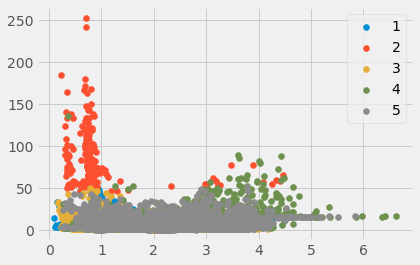

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(x)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(x[label == i , 0] , x[label == i , 1] , label = i + 1)
plt.legend()
plt.show()

# Análisis Discriminante

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
import copy 
datos_Discriminante = copy.deepcopy(new_df[['CO','NO','NO2','NOx','O3','PM25','PM10','PRS','RAINF','RH','SO2','SR','TOUT','WD','WS']])
datos_Discriminante = datos_Discriminante.dropna()

In [ ]:
datos_Discriminante.to_csv('DatosDiscriminante.csv', index = False)

In [ ]:
datos_Discriminante.head()

,CO,NO,NO2,NOx,O3,PM25,PM10,PRS,RAINF,RH,SO2,SR,TOUT,WD,WS
1376,2.48,3.7,13.6,17.3,9.0,34.0,98.0,709.4,0.0,56.0,4.0,0.003,22.43,256.0,1.7
1377,2.40,2.5,10.9,13.4,10.0,33.0,87.0,709.5,0.0,61.0,3.8,0.003,21.78,242.0,1.5
1378,2.41,3.1,11.8,14.8,7.0,77.0,81.0,709.9,0.0,60.0,3.9,0.003,21.59,235.0,1.9
1382,2.57,5.8,8.5,14.3,28.0,23.0,158.0,712.3,0.0,35.0,3.8,0.308,25.93,34.0,12.2
1383,2.39,4.0,5.1,9.1,34.0,167.0,268.0,713.3,0.0,29.0,3.6,0.626,26.21,25.0,13.7


In [ ]:
datos_Discriminante.quantile([0.25,0.5,0.75])


,CO,NO,NO2,NOx,O3,PM25,PM10,PRS,RAINF,RH,SO2,SR,TOUT,WD,WS
0.25,1.29,2.0,3.5,6.0,13.0,13.60,34.0,708.9,0.0,42.0,2.7,0.155,19.2500,59.0,3.8
0.50,1.97,3.6,6.4,10.9,27.0,22.00,50.0,710.9,0.0,57.0,3.4,0.172,23.5800,90.0,6.2
0.75,2.67,7.7,11.2,20.5,45.0,34.23,73.0,713.1,0.0,72.0,5.2,0.183,27.7775,142.0,8.8


In [ ]:
datos_Discriminante['O3_Cong'] = 0
datos_Discriminante.loc[((datos_Discriminante['O3'] <= 95) & (datos_Discriminante['O3'] >= 27)), 'O3_Cong'] = 1
datos_Discriminante.loc[datos_Discriminante['O3'] > 95, 'O3_Cong'] = 2 #fuera de la norma

In [ ]:
datos_Discriminante['O3_Cong'].value_counts()

1    4812
0    4708
2     126
Name: O3_Cong, dtype: int64

In [ ]:
# create the lda model
model = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
#model2 = QuadraticDiscriminantAnalysis(n_components=2)

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X = datos_Discriminante.iloc[:, [0,1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].values
y = datos_Discriminante.iloc[:, [15]].values

model.fit(X, y)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
#datos_Discriminante['Predicted']=model.labels_.tolist()
#datos_Discriminante

In [ ]:
model.score(X, y)

0.9269127099315778

In [ ]:
model.explained_variance_ratio_

array([0.96456094, 0.03543906])

In [ ]:
XLDA = model.transform(X)
XLDA[0,:]

array([-2.03803896,  0.74712199])

In [ ]:
prediction = model.predict(X)

In [ ]:
datos_Discriminante['Predicción'] = prediction

In [ ]:
datos_Discriminante['Predicción'].describe() 

count    9646.000000
mean        0.489633
std         0.545918
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Predicción, dtype: float64

normal
alto
fuera de la norma

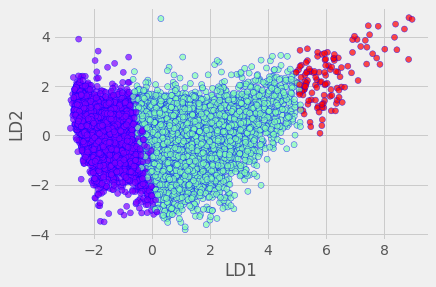

In [ ]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    XLDA[:,0],
    XLDA[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, prediction) # Create CM From Data
cm

array([[4632,   76,    0],
       [ 523, 4183,  106],
       [   0,    0,  126]])

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])

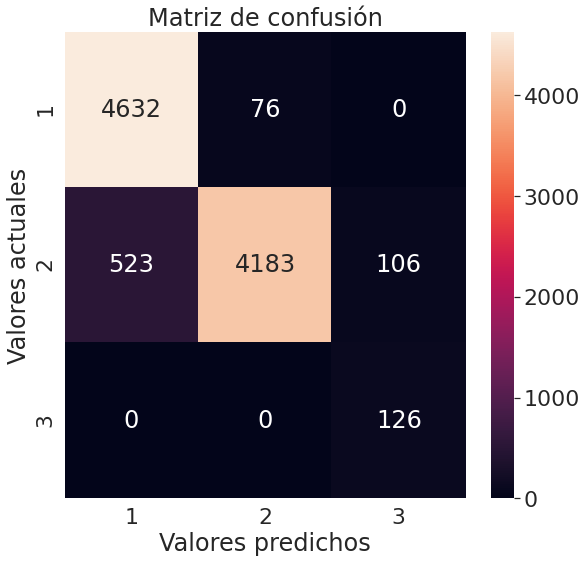

In [ ]:
import seaborn as sns
sns.set(font_scale=2)  # crazy big
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Matriz de confusión')
plt.ylabel('Valores actuales')
plt.xlabel('Valores predichos')
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y, prediction)
precision = precision_score(y, prediction, average='weighted')
recall = recall_score(y, prediction, average='weighted')
from sklearn.metrics import f1_score
res=f1_score(y, prediction, average='weighted')
resultados = {'F1 score' :[res], 'Precision' : [precision], 'Recall' : [recall], 'Accuracy' : [ac]}
resultados = pd.DataFrame.from_dict(resultados)
resultados.T
resultados

,F1 score,Precision,Recall,Accuracy
0,0.927719,0.935612,0.926913,0.926913


# Regresión Lineal Múltiple

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api         as sm
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### PM10

In [ ]:
linear_regression = num.copy()
linear_regression = linear_regression.drop(['Fecha','day','hour','YEAR','MONTH','WEEKDAY','MONTHDAY'], axis = 1)
linear_regression = linear_regression.dropna()
linear_regression

,CO,NO,NO2,NOx,O3,PM25,PM10,PRS,RAINF,RH,SO2,SR,TOUT,WD,WS
1376,2.48,3.7,13.6,17.3,9.0,34.00,98.0,709.4,0.0,56.0,4.0,0.003,22.43,256.0,1.7
1377,2.40,2.5,10.9,13.4,10.0,33.00,87.0,709.5,0.0,61.0,3.8,0.003,21.78,242.0,1.5
1378,2.41,3.1,11.8,14.8,7.0,77.00,81.0,709.9,0.0,60.0,3.9,0.003,21.59,235.0,1.9
1382,2.57,5.8,8.5,14.3,28.0,23.00,158.0,712.3,0.0,35.0,3.8,0.308,25.93,34.0,12.2
1383,2.39,4.0,5.1,9.1,34.0,167.00,268.0,713.3,0.0,29.0,3.6,0.626,26.21,25.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28459,1.95,2.5,5.5,8.2,19.0,6.93,45.0,711.4,0.0,77.0,2.0,0.050,23.28,118.0,9.0
28460,1.89,1.8,4.3,6.3,19.0,4.33,24.0,711.6,0.0,79.0,1.9,0.040,23.31,99.0,9.4
28461,1.90,1.9,5.5,7.7,17.0,3.75,25.0,711.8,0.0,77.0,1.9,0.010,23.51,74.0,8.8
28462,1.90,1.6,5.5,7.2,16.0,5.51,21.0,712.0,0.0,82.0,1.8,0.000,22.62,73.0,5.8


Text(0.5, 1.0, 'Correlaciones entre las variables')

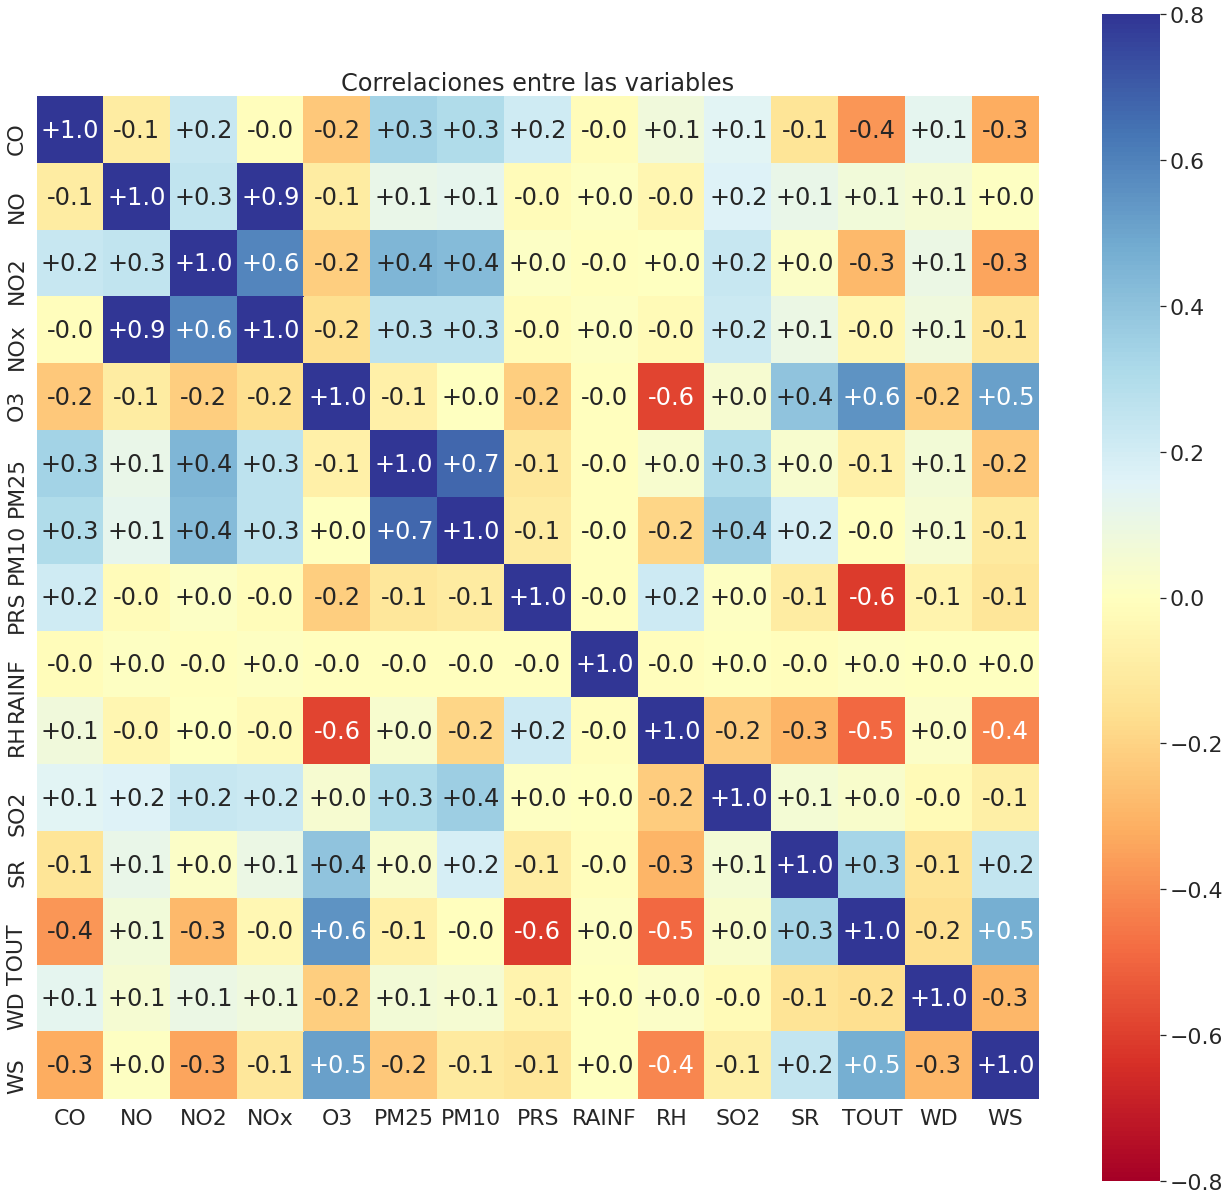

In [ ]:
plt.figure(figsize=(20,20))
sn.heatmap(linear_regression.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-0.8, vmax=0.8, fmt="+.1f")
plt.title("Correlaciones entre las variables")

In [ ]:
linear_regression_PM10 = linear_regression.drop(['TOUT','RAINF','O3'], axis=1)
linear_regression_PM10

,CO,NO,NO2,NOx,PM25,PM10,PRS,RH,SO2,SR,WD,WS
1376,2.48,3.7,13.6,17.3,34.00,98.0,709.4,56.0,4.0,0.003,256.0,1.7
1377,2.40,2.5,10.9,13.4,33.00,87.0,709.5,61.0,3.8,0.003,242.0,1.5
1378,2.41,3.1,11.8,14.8,77.00,81.0,709.9,60.0,3.9,0.003,235.0,1.9
1382,2.57,5.8,8.5,14.3,23.00,158.0,712.3,35.0,3.8,0.308,34.0,12.2
1383,2.39,4.0,5.1,9.1,167.00,268.0,713.3,29.0,3.6,0.626,25.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
28459,1.95,2.5,5.5,8.2,6.93,45.0,711.4,77.0,2.0,0.050,118.0,9.0
28460,1.89,1.8,4.3,6.3,4.33,24.0,711.6,79.0,1.9,0.040,99.0,9.4
28461,1.90,1.9,5.5,7.7,3.75,25.0,711.8,77.0,1.9,0.010,74.0,8.8
28462,1.90,1.6,5.5,7.2,5.51,21.0,712.0,82.0,1.8,0.000,73.0,5.8


In [ ]:
y = linear_regression_PM10['PM10']
X = linear_regression_PM10.drop('PM10', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
LR = LinearRegression().fit(X_train,y_train)

In [ ]:
y_prediction =  LR.predict(X_test)

In [ ]:
score = r2_score(y_test,y_prediction)
print('R2 ajustada: ',score)

R2 ajustada:  0.5413746852220696


### O3

####Construcción del modelo, ANOVA e intervalos de confianza

Text(0.5, 1.0, 'Correlaciones entre las variables')

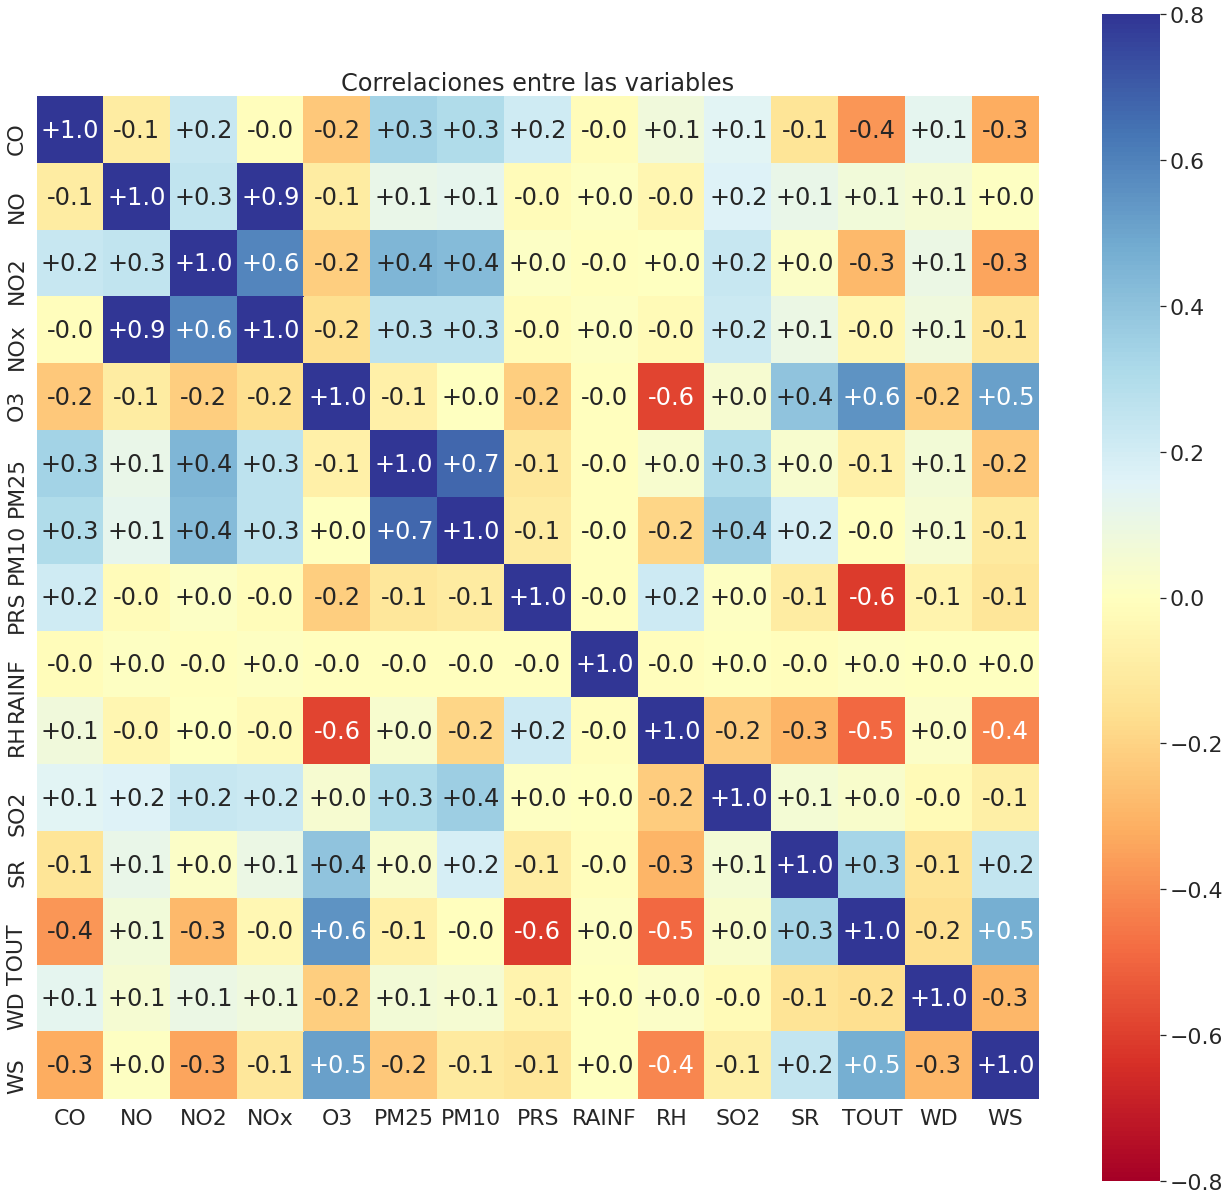

In [ ]:
plt.figure(figsize=(20,20))
sn.heatmap(linear_regression.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-0.8, vmax=0.8, fmt="+.1f")
plt.title("Correlaciones entre las variables")

In [ ]:
modelo_lineal_O3 = smf.ols('O3 ~ CO + NO + NO2 + NOx + PM25 + PRS + RH + SR + TOUT + WD + WS + SO2 + RAINF + PM10', data=linear_regression).fit()
modelo_lineal_O3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     886.1
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:20:38   Log-Likelihood:                -43585.
No. Observations:               10500   AIC:                         8.720e+04
Df Residuals:                   10485   BIC:                         8.731e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -224.2472     43.486     -5.157      0.000    -309.487    -139.007
CO            -1.2482      0.195     -6.399      0.000      -1.631      -0.866
NO            -0.1997      0.126     -1.580      0.114      -0.447       0.048
NO2           -0.1622      0.129     -1.256      0.209      -0.415       0.091
NOx           -0.0181      0.127     -0.143      0.886      -0.266       0.230
PM25           0.1819      0.014     13.457      0.000       0.155       0.208
PRS            0.3636      0.060      6.042      0.000       0.246       0.482
RH            -0.4565      0.011    -42.824      0.000      -0.477      -0.436
SR            19.4010      0.769     25.235      0.000      17.894      20.908
TOUT           0.8147      0.041     19.719      0.000       0.734       0.896
WD            -0.0191      0.002     -9.985      0.000      -0.023      -0.015
WS             1.1187      0.056     20.025      0.000       1.009       1.228
SO2           -0.0110      0.067     -0.164      0.870      -0.142       0.120
RAINF      -1472.6378   1538.195     -0.957      0.338   -4487.792    1542.516
PM10          -0.0681      0.006    -10.806      0.000      -0.080      -0.056
==============================================================================
Omnibus:                     1760.674   Durbin-Watson:                   0.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4856.831
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                       5.800   Cond. No.                     7.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelo_lineal_O3 = smf.ols('O3 ~ CO + NO + NO2 + PM25 + PRS + RH + SR + TOUT + WD + WS + SO2 + RAINF + PM10', data=linear_regression).fit()
modelo_lineal_O3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     954.3
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:20:38   Log-Likelihood:                -43585.
No. Observations:               10500   AIC:                         8.720e+04
Df Residuals:                   10486   BIC:                         8.730e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -224.2159     43.483     -5.156      0.000    -309.451    -138.981
CO            -1.2423      0.191     -6.518      0.000      -1.616      -0.869
NO            -0.2177      0.011    -19.729      0.000      -0.239      -0.196
NO2           -0.1802      0.029     -6.261      0.000      -0.237      -0.124
PM25           0.1818      0.013     13.478      0.000       0.155       0.208
PRS            0.3636      0.060      6.041      0.000       0.246       0.482
RH            -0.4567      0.011    -43.029      0.000      -0.477      -0.436
SR            19.4003      0.769     25.236      0.000      17.893      20.907
TOUT           0.8146      0.041     19.722      0.000       0.734       0.896
WD            -0.0192      0.002     -9.993      0.000      -0.023      -0.015
WS             1.1185      0.056     20.027      0.000       1.009       1.228
SO2           -0.0104      0.067     -0.156      0.876      -0.141       0.120
RAINF      -1472.1547   1538.119     -0.957      0.339   -4487.161    1542.851
PM10          -0.0681      0.006    -10.807      0.000      -0.080      -0.056
==============================================================================
Omnibus:                     1760.507   Durbin-Watson:                   0.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4856.231
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                       5.800   Cond. No.                     7.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelo_lineal_O3 = smf.ols('O3 ~ CO + NO + NO2 + PM25 + PRS + RH + SR + TOUT + WD + WS + RAINF + PM10', data=linear_regression).fit()
modelo_lineal_O3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     1034.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:20:38   Log-Likelihood:                -43585.
No. Observations:               10500   AIC:                         8.720e+04
Df Residuals:                   10487   BIC:                         8.729e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -223.5947     43.299     -5.164      0.000    -308.470    -138.720
CO            -1.2431      0.190     -6.526      0.000      -1.617      -0.870
NO            -0.2179      0.011    -19.907      0.000      -0.239      -0.196
NO2           -0.1804      0.029     -6.269      0.000      -0.237      -0.124
PM25           0.1816      0.013     13.545      0.000       0.155       0.208
PRS            0.3626      0.060      6.056      0.000       0.245       0.480
RH            -0.4563      0.010    -44.008      0.000      -0.477      -0.436
SR            19.4076      0.767     25.293      0.000      17.903      20.912
TOUT           0.8142      0.041     19.748      0.000       0.733       0.895
WD            -0.0191      0.002    -10.020      0.000      -0.023      -0.015
WS             1.1197      0.055     20.229      0.000       1.011       1.228
RAINF      -1473.0846   1538.036     -0.958      0.338   -4487.928    1541.759
PM10          -0.0682      0.006    -10.944      0.000      -0.080      -0.056
==============================================================================
Omnibus:                     1759.831   Durbin-Watson:                   0.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4853.359
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                       5.799   Cond. No.                     7.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelo_lineal_O3 = smf.ols('O3 ~ CO + NO + NO2 + PM25 + PRS + RH + SR + TOUT + WD + WS  + PM10', data=linear_regression).fit()
modelo_lineal_O3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     1128.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:20:38   Log-Likelihood:                -43586.
No. Observations:               10500   AIC:                         8.720e+04
Df Residuals:                   10488   BIC:                         8.728e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -223.1184     43.296     -5.153      0.000    -307.988    -138.249
CO            -1.2406      0.190     -6.513      0.000      -1.614      -0.867
NO            -0.2180      0.011    -19.915      0.000      -0.239      -0.197
NO2           -0.1804      0.029     -6.272      0.000      -0.237      -0.124
PM25           0.1815      0.013     13.543      0.000       0.155       0.208
PRS            0.3620      0.060      6.046      0.000       0.245       0.479
RH            -0.4563      0.010    -44.005      0.000      -0.477      -0.436
SR            19.4184      0.767     25.310      0.000      17.915      20.922
TOUT           0.8137      0.041     19.738      0.000       0.733       0.894
WD            -0.0191      0.002    -10.026      0.000      -0.023      -0.015
WS             1.1198      0.055     20.231      0.000       1.011       1.228
PM10          -0.0682      0.006    -10.944      0.000      -0.080      -0.056
==============================================================================
Omnibus:                     1760.234   Durbin-Watson:                   0.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4853.616
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                       5.799   Cond. No.                     2.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####Análisis Residuos

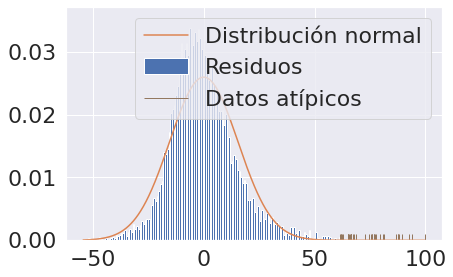

In [ ]:
plt.hist(modelo_lineal_O3.resid, density=True, bins=200, label="Residuos");

x = np.linspace(modelo_lineal_O3.resid.min(), modelo_lineal_O3.resid.max(), num=1000)
plt.plot(x, scipy.stats.norm.pdf(x, loc=0.0, scale=np.sqrt(modelo_lineal_O3.scale)),
    label="Distribución normal")
outliers = np.abs(modelo_lineal_O3.resid)>4*np.sqrt(modelo_lineal_O3.scale)
sn.rugplot(modelo_lineal_O3.resid[outliers],
            color="C5", 
            label="Datos atípicos")
plt.legend(loc="upper right");

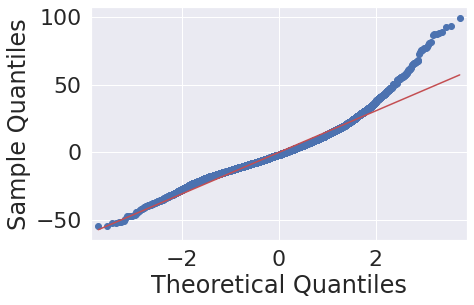

In [ ]:
sm.qqplot(modelo_lineal_O3.resid, line="s");

In [ ]:
linear_regression['Estimado O3'] = modelo_lineal_O3.predict()
linear_regression['Residuos O3'] = modelo_lineal_O3.resid

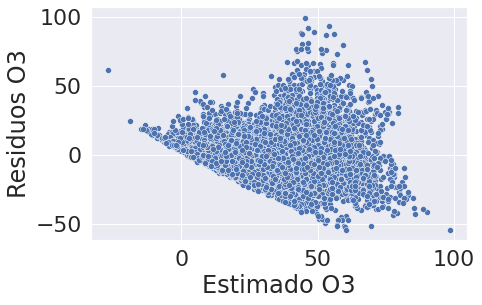

In [ ]:
sn.scatterplot(x='Estimado O3', y='Residuos O3', data=linear_regression)